--- Signal Synthesis using IDFT ---
N = 10
Input Spectrum X_mu = 
[6.+0.j 2.+0.j 4.+0.j 3.+0.j 4.+0.j 5.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]

Matrix K (mu * k) = 
[[ 0  0  0  0  0  0  0  0  0  0]
 [ 0  1  2  3  4  5  6  7  8  9]
 [ 0  2  4  6  8 10 12 14 16 18]
 [ 0  3  6  9 12 15 18 21 24 27]
 [ 0  4  8 12 16 20 24 28 32 36]
 [ 0  5 10 15 20 25 30 35 40 45]
 [ 0  6 12 18 24 30 36 42 48 54]
 [ 0  7 14 21 28 35 42 49 56 63]
 [ 0  8 16 24 32 40 48 56 64 72]
 [ 0  9 18 27 36 45 54 63 72 81]]

Matrix W (Fourier Matrix, W[mu, k] = exp(j*2*pi/N*mu*k)) = 
[[ 1.   +0.j     1.   +0.j     1.   +0.j     1.   +0.j     1.   +0.j
   1.   +0.j     1.   +0.j     1.   +0.j     1.   +0.j     1.   +0.j   ]
 [ 1.   +0.j     0.809+0.588j  0.309+0.951j -0.309+0.951j -0.809+0.588j
  -1.   +0.j    -0.809-0.588j -0.309-0.951j  0.309-0.951j  0.809-0.588j]
 [ 1.   +0.j     0.309+0.951j -0.809+0.588j -0.809-0.588j  0.309-0.951j
   1.   -0.j     0.309+0.951j -0.809+0.588j -0.809-0.588j  0.309-0.951j]
 [ 1.   +0.j    

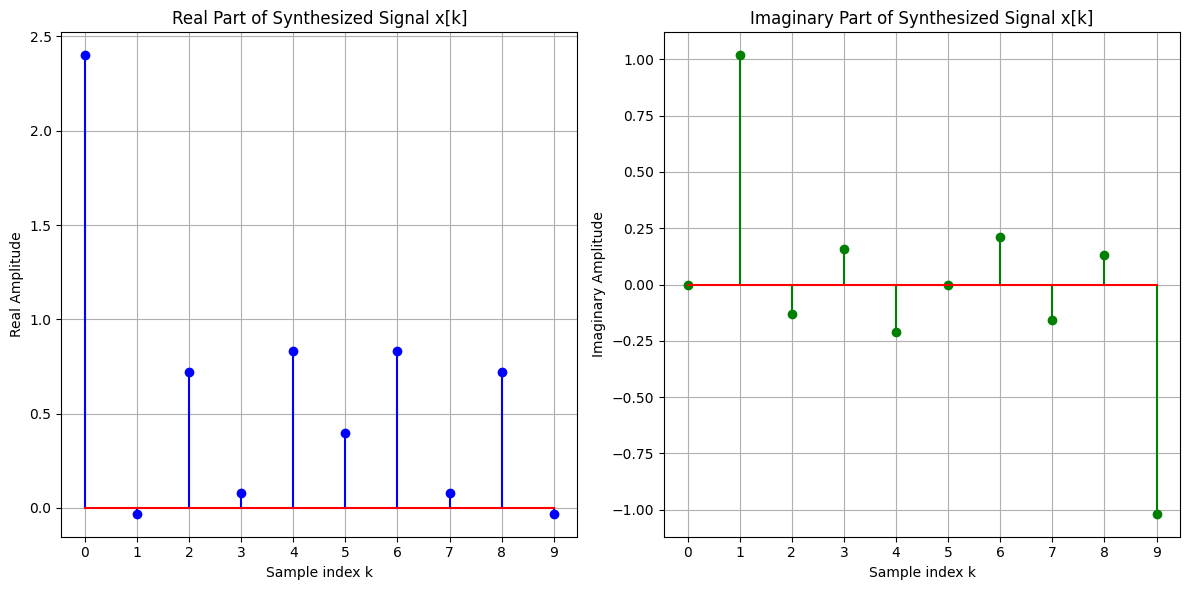

Verification: DFT of calculated x_k (W_conj @ x_k) = 
[ 6.00000000e+00+6.66133815e-16j  2.00000000e+00+4.44089210e-16j
  4.00000000e+00+0.00000000e+00j  3.00000000e+00+0.00000000e+00j
  4.00000000e+00-2.22044605e-16j  5.00000000e+00-8.88178420e-16j
 -1.11022302e-16-6.66133815e-16j -1.11022302e-15-4.55191440e-15j
  1.11022302e-15-1.49880108e-15j  2.22044605e-16-2.22044605e-16j]

Matches original X_mu? True


In [2]:
import numpy as np
import matplotlib.pyplot as plt

X_mu = np.array([6, 2, 4, 3, 4, 5, 0, 0, 0, 0], dtype=complex)
N = len(X_mu)

print("Signal Synthesis using IDFT")
print(f"N = {N}")
print(f"Input Spectrum X_mu = \n{X_mu}\n")

k_range = np.arange(N)
mu_range = np.arange(N)
K = np.outer(mu_range, k_range)

print(f"Matrix K (mu * k) = \n{K}\n")

W = np.exp(1j * 2 * np.pi / N * K)

np.set_printoptions(precision=3, suppress=True)
print(f"Matrix W (Fourier Matrix, W[mu, k] = exp(j*2*pi/N*mu*k)) = \n{W}\n")
np.set_printoptions(precision=8, suppress=False)

x_k = (1 / N) * np.dot(W, X_mu)

print(f"Synthesized Signal x_k (IDFT result) = \n{x_k}\n")

k_indices = np.arange(N)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.stem(k_indices, x_k.real, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.title('Real Part of Synthesized Signal x[k]')
plt.xlabel('Sample index k')
plt.ylabel('Real Amplitude')
plt.grid(True)
plt.xticks(k_indices)

plt.subplot(1, 2, 2)
plt.stem(k_indices, x_k.imag, linefmt='g-', markerfmt='go', basefmt='r-')
plt.title('Imaginary Part of Synthesized Signal x[k]')
plt.xlabel('Sample index k')
plt.ylabel('Imaginary Amplitude')
plt.grid(True)
plt.xticks(k_indices)

plt.tight_layout()
plt.show()

W_dft = W.conj()
X_mu_check = np.dot(W_dft, x_k)

print(f"Verification: DFT of calculated x_k (W_conj @ x_k) = \n{X_mu_check}\n")
print(f"Matches original X_mu? {np.allclose(X_mu, X_mu_check)}")